# SEN122A Statistical Analysis of Choice Behaviour

## `Session Lab 01B:`
## `Introduction to choice behaviour analysis`

**Delft University of Technology**<br>
**Q2 2024**<br>
**Instructor:** Sander van Cranenburgh<br>
**TA:**  Gabriel Nova <br>

### `Instructions`

**Lab sessions aim to:**<br>
* Illustrate how models and theory discussed in the classroom work out in practice.
* Help you gather hands-on modelling and data analysis skills.


**Lab sessions are:**<br>
* Learning environments where you work with Python and get support from TA and fellow students.
* Not graded and do not have to be submitted.
* A good preparation for the graded partial exam.

### `Application: Modelling neighbourhood choices`

In this lab session, we will analyse neighbourhood location choice behaviour. Understanding people's preferences over neighbourhood characteristics is crucial for city planners when they (re)develop neighbourhoods or devise policies to tackle e.g. residential segregation. During this lab session, you will apply discrete choice models to uncover people's preferences over attributes, such as the distance to the city centre and the share of foreigners in their neighbourhood. Also, you will explore whether preferences interact with covariates such as age, gender, home ownership, car ownership and urbanisation level. While doing so, you will test various utility specifications and interpret the modelling outcomes of discrete choice models.

For this study, we use data from a Stated Choice (SC) experiment, which was conducted between 2017 and 2018 in four European cities: Hanover, Mainz, Bern, and Zurich.

![SC](./data/sc_experiment.png)

**`Learning objectives lab session 01B`**

After completing the following lab session, you will be able to:
* Test alternative utility specification with interactions and nonlinearities
* Understand the impact of the sample size on the standard errors of the estimates


**`This lab consists of 2 parts and has 2 exercises`**

**Part 1**: Interactions with socio-demographic variables and nonlinear utilities
- Exerise 1: "Modelling interactions with socio-demographic variables"
- Exerise 2: "Nonlinear utility specifcations"

**Part 2**: Understanding the impact of the sample size on the standard errors of the estimates
- Excerise 3: "Impact of sample size on standard errors"

#### `Import packages`

To begin, we will import all the Python libraries that we will use in this lab session.

In [1]:
# Biogeme
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta, Variable, log, exp

# General python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path

# Pandas setting to show all columns when displaying a pandas dataframe
pd.set_option('display.max_columns', None)

## Part 1: Interactions with socio-demographic variables and nonlinear utilities
In this part, we will: 
1. Load the data. 
1. Estimate the basic linear-additive RUM-MNL model. This model serves as the benchmark.
1. Explore how tastes vary across socio-demographic groups, using interaction terms. Specifically, we will test whether males and females have different of the tasted for the share of foreigners in the neighbourhood.
1. Assess the validity of the the linearity assumption of the utility function by testing a non-linear utility specification.

### `1. Load the data set` <br>

**`Load the data set`** <br>

In [2]:
# Load the data as a pandas dataframe
data_path =  Path(f'data/choice_data_cleaned.dat')
df = pd.read_csv(data_path, sep='\t')

### `2. The linear-additive RUM-MNL model` <br>

**`Biogeme database`**<br>
To use biogeme, we first need to create the data set as a Biogeme database object using `db.Database()`. This object contains the data in a format compatible with the library functions for model estimation in Biogeme.

In [3]:
# db.Database takes as arguments (1) a name (string) and (2) a data set (pandas dataframe)
biodata = db.Database('Neighboorhood_choice_data', df)

**`Estimation function`** 

To estimate the MNL models, we use the function `estimate_mnl()` that we created in Lab 1.<br>
This time we directly import the function from the file `estimation_functions.py` and use it to estimate the MNL model.<br>
<br>
It takes the following inputs:<br>
* Systematic utilities function (**V1, V2, V3**)
* Chosen alternatives array (**CHOICE**)
* Database which contains the relevant attributes and characteristics (**database**)
* Model name (**"string"**)

In [4]:
# Import the estimation function
from estimation_functions import estimate_mnl
# To use it, we invoke result = estimate_mnl(V1,V2,V3,CHOICE,database,name)

**`Biogeme variables`**<br>

Also, we need to create Biogeme objects for all the variables in our data set that we want to use in our model specifications.<br>
The `Variable()` function creates an object that represents the variable values and will allow it to be included in the model estimation function.

In [5]:
# We create Variable objects for each of the variables in the data set that we want to use in the model

# Attributes of alternative 1
STORES1     = Variable('STORES1')
TRANSPORT1  = Variable('TRANSPORT1')
CITY1       = Variable('CITY1')
NOISE1      = Variable('NOISE1')
GREEN1      = Variable('GREEN1')
FOREIGN1    = Variable('FOREIGN1')

# Attributes of alternative 2    
STORES2     = Variable('STORES2')
TRANSPORT2  = Variable('TRANSPORT2')
CITY2       = Variable('CITY2')
NOISE2      = Variable('NOISE2')
GREEN2      = Variable('GREEN2')
FOREIGN2    = Variable('FOREIGN2')
    
# Attributes of alternative 3
STORES3     = Variable('STORES3')
TRANSPORT3  = Variable('TRANSPORT3')
CITY3       = Variable('CITY3')
NOISE3      = Variable('NOISE3')
GREEN3      = Variable('GREEN3')
FOREIGN3    = Variable('FOREIGN3')

# The choice
CHOICE      = Variable('CHOICE')

# Socio-economic variables
AGE         = Variable('AGE')
WOMAN       = Variable('WOMAN')
HOMEOWNER   = Variable('HOMEOWNER')
CAROWNER    = Variable('CAROWNER')
RESPCITY    = Variable('RESPCITY')
JOB         = Variable('JOB')

**`The linear-additive utility specification`**

The cell below creates the utility functions for a linear-additive RUM model in Biogeme.

In [6]:
# Give a name to the model    
model_name = 'Linear-additive RUM-MNL'

# Define the model parameters, using the function "Beta()", in which you must define:
# the name of the parameter,
# starting value, 
# lower bound,
# upper bound, 
# 0 or 1, indicating if the parameter must be estimated. 0 means estimated, 1 means fixed to the starting value. 
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0)

# Define the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

**`Estimation of the linear-additive RUM-MNL model`**

We pass the model specifications and the database to the estimation function, which returns an object which contains the estimation results.

In [7]:
# Estimate the model
results_MNL = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)

In [8]:
# Print the estimation statistics
print(results_MNL.short_summary())

# Get the model parameters in a pandas table and  print it
beta_hat_MNL = results_MNL.get_estimated_parameters()
print(beta_hat_MNL)

# Store the LL of the MNL model for later use
LL_MNL = results_MNL.data.logLike

Results for model Linear-additive RUM-MNL
Nbr of parameters:		6
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8403.772
Likelihood ratio test (null):		3969.412
Rho square (null):			0.191
Rho bar square (null):			0.19
Akaike Information Criterion:	16819.54
Bayesian Information Criterion:	16862.47

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.167571      0.008076   -20.749441           0.0
B_foreign   -1.177581      0.109050   -10.798570           0.0
B_green      0.415726      0.011397    36.476251           0.0
B_noise     -0.438061      0.010593   -41.352803           0.0
B_stores    -0.034551      0.002587   -13.354178           0.0
B_transport -0.074348      0.002486   -29.911007           0.0


### `3. Interactions with socio-demographic variables` <br>

Preferences and tastes may vary across socio-demographic segments of the population. By interacting socio-demographic variables with the other attributes, we can obtain insights into how preferences vary across socio-demographic groups.<br>

For example, we can include the variable `WOMAN` as an interaction with one of the attributes, e.g. `FOREIGN`. This allows us to analyse whether there is a difference between males and females in terms of their taste over this attribute. <br>

To specify a model with interactions, we create separate taste parameters for `WOMAN` and for `MAN`, to interact with the attribute `FOREIGN`: <br>

    B_foreign_woman = Beta('B_foreign_woman'  , 0, None, None, 0)
    B_foreign_man   = Beta('B_foreign_man'    , 0, None, None, 0)

    V1 =  ... + (B_foreign_man * (WOMAN == 0) + B_woman_foreign_woman * (WOMAN == 1)) * FOREIGN1

The logical statements (WOMAN == 0) and (WOMAN == 1) are used to create a dummy variable that takes the value 1 if the condition is met and 0 otherwise. This allows us to estimate the gender-specific taste parameters for B_foreign.

In [9]:
# Give a name to the model   
model_name = 'Linear-additive RUM-MNL with interaction term'

B_stores        = Beta('B_stores'       , 0, None, None, 0)
B_transport     = Beta('B_transport'    , 0, None, None, 0)
B_city          = Beta('B_city'         , 0, None, None, 0)
B_noise         = Beta('B_noise'        , 0, None, None, 0)
B_green         = Beta('B_green'        , 0, None, None, 0)
B_foreign_man   = Beta('B_foreign_man'  , 0, None, None, 0)
B_foreign_woman = Beta('B_foreign_woman', 0, None, None, 0)

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN3

# Estimate the model using the estimate_mnl function created before
results_interaction = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)

# Print the estimation statistics
print(results_interaction.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_interaction = results_interaction.get_estimated_parameters()
print(beta_hat_interaction)


Results for model Linear-additive RUM-MNL with interaction term
Nbr of parameters:		7
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8399.519
Likelihood ratio test (null):		3977.917
Rho square (null):			0.191
Rho bar square (null):			0.191
Akaike Information Criterion:	16813.04
Bayesian Information Criterion:	16863.12

                    Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city          -0.167538      0.008077   -20.742906  0.000000e+00
B_foreign_man   -1.522909      0.163102    -9.337181  0.000000e+00
B_foreign_woman -0.876878      0.146795    -5.973478  2.322477e-09
B_green          0.415810      0.011399    36.479316  0.000000e+00
B_noise         -0.438447      0.010595   -41.380782  0.000000e+00
B_stores        -0.034471      0.002587   -13.325366  0.000000e+00
B_transport     -0.074408      0.002486   -29.932191  0.000000e+00


**Interpretation:**<br>
The coefficient `B_foreign` represents the marginal utility of the percentage of foreigners in a neighbourhood. Since the estimated coefficient is negative, it means that an increase in the percentage of foreigners in a neighbourhood makes it less attractive.  In this model, we have interacted `gender` with the attribute `FOREIGN`. The parameters `B_foreign_woman` and `B_foreign_man` show that man and woman have different tastes over this attribute. Since the estimated coefficient is much smaller for woman than fro man, it indicates that woman place less value on the share of foreigners in a neighbourhood than men. 

### `Excersice 1: Modelling interactions with socio-demographic variables`

Investigate whether inhabitants of different cities also have different tastes over the share of foreigners. To investigate this, you need to estimate another MNL model in which you interact the variable `RESPECITY` with `FOREIGN`. Note that RESPCITY has 4 categorical levels.

Interpret your results. <br>

`A` Do you find evidence of taste heterogeneity? I.e. do inhabitants of different cities have different tastes over the share of foreigners?<br>

`B` Use the LRS to determine whether the model with interactions outperforms the linear-additive RUM-MNL model without interactions.

#### `Answers`

In [10]:
# A
# Give a name to the model   
model_name = 'Linear-additive RUM-MNL with interaction term RESPCITY'

B_stores        = Beta('B_stores'       , 0, None, None, 0)
B_transport     = Beta('B_transport'    , 0, None, None, 0)
B_city          = Beta('B_city'         , 0, None, None, 0)
B_noise         = Beta('B_noise'        , 0, None, None, 0)
B_green         = Beta('B_green'        , 0, None, None, 0)
B_foreign_rc1   = Beta('B_foreign_rc1'  , 0, None, None, 0)
B_foreign_rc2   = Beta('B_foreign_rc2'  , 0, None, None, 0)
B_foreign_rc3   = Beta('B_foreign_rc3'  , 0, None, None, 0)
B_foreign_rc4   = Beta('B_foreign_rc4'  , 0, None, None, 0)


# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + (B_foreign_rc1 *(RESPCITY==1) + B_foreign_rc2 *(RESPCITY==2) + B_foreign_rc3 *(RESPCITY==3) + B_foreign_rc4 *(RESPCITY==4)) * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + (B_foreign_rc1 *(RESPCITY==1) + B_foreign_rc2 *(RESPCITY==2) + B_foreign_rc3 *(RESPCITY==3) + B_foreign_rc4 *(RESPCITY==4)) * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + (B_foreign_rc1 *(RESPCITY==1) + B_foreign_rc2 *(RESPCITY==2) + B_foreign_rc3 *(RESPCITY==3) + B_foreign_rc4 *(RESPCITY==4)) * FOREIGN3

# Estimate the model using the estimate_mnl function created before
results_interaction_rc = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)

# Print the estimation statistics
print(results_interaction_rc.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_interaction_rc = results_interaction_rc.get_estimated_parameters()
print(beta_hat_interaction_rc)

Results for model Linear-additive RUM-MNL with interaction term RESPCITY
Nbr of parameters:		9
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8376.42
Likelihood ratio test (null):		4024.115
Rho square (null):			0.194
Rho bar square (null):			0.193
Akaike Information Criterion:	16770.84
Bayesian Information Criterion:	16835.23

                  Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city        -0.168761      0.008093   -20.852770  0.000000e+00
B_foreign_rc1 -1.808540      0.229434    -7.882620  3.108624e-15
B_foreign_rc2 -2.553211      0.268918    -9.494387  0.000000e+00
B_foreign_rc3 -0.532260      0.185475    -2.869717  4.108393e-03
B_foreign_rc4 -0.521514      0.213315    -2.444804  1.449311e-02
B_green        0.417830      0.011433    36.547463  0.000000e+00
B_noise       -0.439319      0.010652   -41.242310  0.000000e+00
B_stores      -0.034918      0.002592   -13.470566  0.000000e+00
B_transport   -0.074586      0.002496 

A. 

        --> Yes, inhabitants of City 1 and 2 (the German cities) are much more sensitive to the share of foreigners than City 3 and 4 (the Swiss cities).
B. 

        --> The LRS is 54. This far exceeds the critical X2 value with 3 degrees of freedom (7.81).

In [11]:
# B
# Compute the LRS
LL_MNL_interaction = results_interaction_rc.data.logLike
LRS = -2*(LL_MNL_interaction - LL_MNL)
print(f'LRS = {LRS:0.2f}')

LRS = -54.70


### `4. Nonlinear utility specifications`

Until now, we have assumed in our utility specification that utility is linear (and additive). This means that the change in utility caused by a unit change in the attribute level is independent of attribute's base level. We are to going assess the validity of this assumption by testing the alternative hypothesis, i.e. utility is nonlinear.<br>

More specifically, we test the assumption that the utility derived from distance to the grocery store (`STORES`) takes a logarithmic form:

$ V_{i} = \beta_{STORES}\ln(STORESi) + ...$

Because the logarithm is a globally concave function, this assumption implies that the disutility of e.g. a 10-minutes trip is less than the disutility of two trips of 5 minutes. The plot below illustrates this assumption.

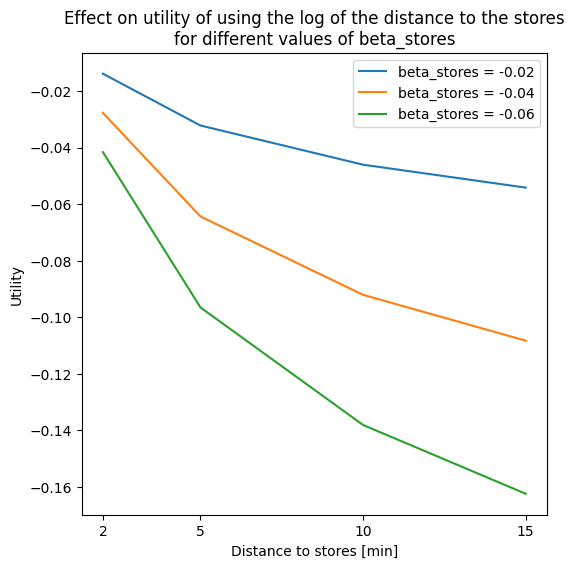

In [12]:
# Illustrate the effect of the log of distance to the stores on the utility
fig, ax = plt.subplots(figsize=(6, 6))
beta_stores = [-0.02, -0.04, -0.06]
for beta in beta_stores:
    x = np.sort(df['STORES1'].unique())
    V = beta*np.log(x)
    ax.plot(x, V, label=f'beta_stores = {beta}')
ax.set_xlabel('Distance to stores [min]')
ax.set_xticks(x)
ax.set_ylabel('Utility')
ax.legend()
ax.set_title('Effect on utility of using the log of the distance to the stores\nfor different values of beta_stores')
plt.show()

In [13]:
# Give a name to the model  
model_name = 'MNL with non-linearities'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 

# Definition of the utility functions
V1 = B_stores * log(STORES1) + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * log(STORES2) + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * log(STORES3) + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

# Estimate
results_nonlin = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)   

# Print the estimation statistics
print(results_nonlin.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_nonlin = results_nonlin.get_estimated_parameters()
print(beta_hat_nonlin)

Results for model MNL with non-linearities
Nbr of parameters:		6
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8423.767
Likelihood ratio test (null):		3929.421
Rho square (null):			0.189
Rho bar square (null):			0.189
Akaike Information Criterion:	16859.53
Bayesian Information Criterion:	16902.46

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.165454      0.008114   -20.391927           0.0
B_foreign   -1.151919      0.108219   -10.644337           0.0
B_green      0.415660      0.011428    36.371321           0.0
B_noise     -0.436410      0.010622   -41.087387           0.0
B_stores    -0.194316      0.016162   -12.023363           0.0
B_transport -0.073419      0.002477   -29.644788           0.0


**Interpretation:**<br>
The results clearly show that the model fit (i.e. the Final LL) deteriorated because of the nonlinearity assumption. Hence, we keep our assumption that utility is linear with the distance to `STORES`.

### `Exercise 2: Nonlinear utility specifications`

Now, let's turn our attention to the attribute `NOISE`. With noise, we expect the opposite effect of diminishing marginal utility. That is, the utility derived from "high" traffic noise (level 4) is probably much worse than that of two times "little" traffic noise (level 2). To investigate this, you need to estimate two nonlinear models, in which you try:

(1) $ V_i = ... + \beta_{noise} \cdot exp(NOISE) + ... $

(2) $ V_i = ... + \beta_{noise} \cdot NOISE + \beta_{noise^2} \cdot NOISE^2 + ...   $

Interpret your results. <br>

`A` Do you find evidence of nonlinear utility? <br>

`B` Which of the two models is statistically the best model?

In [14]:
# Your code and answers

A. Do you find evidence of nonlinear utility? 

        --> Yes, accounting for the nonlinear utility of NOISE leads to a great improvement in model fit
B. Which of the two models is statistically the best model?

        --> Specification 2 obtains the best model fit. It consumes 1 extra parameter. But, the model fit improvement (-8064.78 vs -8088.62) far exceeds the critical LRS.

In [15]:
# Give a name to the model  
model_name = 'MNL with nonlinearities'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 


# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * exp(NOISE1) + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * exp(NOISE2) + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * exp(NOISE3) + B_green * GREEN3 + B_foreign * FOREIGN3

# Estimate
results_nonlin = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)   

# Print the estimation statistics
print(results_nonlin.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_nonlin = results_nonlin.get_estimated_parameters()
print(beta_hat_nonlin)

Results for model MNL with nonlinearities
Nbr of parameters:		6
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8088.621
Likelihood ratio test (null):		4599.714
Rho square (null):			0.221
Rho bar square (null):			0.221
Akaike Information Criterion:	16189.24
Bayesian Information Criterion:	16232.17

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.180825      0.008116   -22.281189           0.0
B_foreign   -1.245139      0.112623   -11.055812           0.0
B_green      0.415240      0.011875    34.966675           0.0
B_noise     -0.032587      0.000767   -42.501794           0.0
B_stores    -0.038061      0.002656   -14.329424           0.0
B_transport -0.073922      0.002564   -28.833183           0.0


In [16]:
# Give a name to the model  
model_name = 'MNL with non-linearities'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 
B_noise_2    = Beta('B_noise_2'    , 0, None, None, 0)   

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_noise_2 * NOISE1**2 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_noise_2 * NOISE2**2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_noise_2 * NOISE3**2 + B_green * GREEN3 + B_foreign * FOREIGN3

# Estimate
results_nonlin = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)   

# Print the estimation statistics
print(results_nonlin.short_summary())

# Get the model parameters in a pandas table and print it
beta_hat_nonlin = results_nonlin.get_estimated_parameters()
print(beta_hat_nonlin)

Results for model MNL with non-linearities
Nbr of parameters:		7
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8064.786
Likelihood ratio test (null):		4647.383
Rho square (null):			0.224
Rho bar square (null):			0.223
Akaike Information Criterion:	16143.57
Bayesian Information Criterion:	16193.65

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.181262      0.008218   -22.056682           0.0
B_foreign   -1.316796      0.114231   -11.527524           0.0
B_green      0.410875      0.011932    34.434089           0.0
B_noise      1.186002      0.064218    18.468443           0.0
B_noise_2   -0.342646      0.013508   -25.365398           0.0
B_stores    -0.038591      0.002696   -14.313300           0.0
B_transport -0.074350      0.002628   -28.288551           0.0


### `Categorical treatment of variables` <br>
Alternatively, we can treat the attribute `NOISE` as a categorical variable. This allows us to estimate separate taste parameters for each level of the attribute. This is useful when we do not have a clear idea of the functional form of the utility function.

In [17]:
# Give a name to the model  
model_name = 'MNL with categorical NOISE'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 
B_noise_cat1    = Beta('B_noise_cat1'    , 0, None, None, 1)   
B_noise_cat2    = Beta('B_noise_cat2'    , 0, None, None, 0)   
B_noise_cat3    = Beta('B_noise_cat3'    , 0, None, None, 0)   
B_noise_cat4    = Beta('B_noise_cat4'    , 0, None, None, 0)   

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise_cat1 * (NOISE1==1) + B_noise_cat2 * (NOISE1==2) + B_noise_cat3 * (NOISE1==3) + B_noise_cat4 * (NOISE1==4) + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise_cat1 * (NOISE2==1) + B_noise_cat2 * (NOISE2==2) + B_noise_cat3 * (NOISE2==3) + B_noise_cat4 * (NOISE2==4) + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise_cat1 * (NOISE3==1) + B_noise_cat2 * (NOISE3==2) + B_noise_cat3 * (NOISE3==3) + B_noise_cat4 * (NOISE3==4) + B_green * GREEN3 + B_foreign * FOREIGN3

# Estimate
results_cat = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)   

# Print the estimation statistics
print(results_cat.short_summary())

# Get the model parameters in a pandas table and print it
beta_hat_cat = results_cat.get_estimated_parameters()
print(beta_hat_cat)

Results for model MNL with categorical NOISE
Nbr of parameters:		8
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8044.279
Likelihood ratio test (null):		4688.397
Rho square (null):			0.226
Rho bar square (null):			0.225
Akaike Information Criterion:	16104.56
Bayesian Information Criterion:	16161.79

                 Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city       -0.181765      0.008148   -22.307875      0.000000
B_foreign    -1.271681      0.113783   -11.176367      0.000000
B_green       0.409461      0.011872    34.490002      0.000000
B_noise_cat2  0.044092      0.031186     1.413845      0.157407
B_noise_cat3 -0.296303      0.031893    -9.290445      0.000000
B_noise_cat4 -1.692892      0.044835   -37.758546      0.000000
B_stores     -0.038647      0.002661   -14.524870      0.000000
B_transport  -0.073284      0.002623   -27.939561      0.000000


**Interpretation:**<br>
The results show that the model fit is even better when treating `NOISE` as a categorical variable than using the squared term. We can conduct an LRS to determine whether the model with the categorical treatment of `NOISE` outperforms the model with the squared term.
The categorical model consumes 1 extra parameter, but the model fit improvement (-8044.28 vs. -8064.78) far exceeding the critical LRS.

 beta_noise = [ 0.          0.0440922  -0.29630263 -1.69289198]


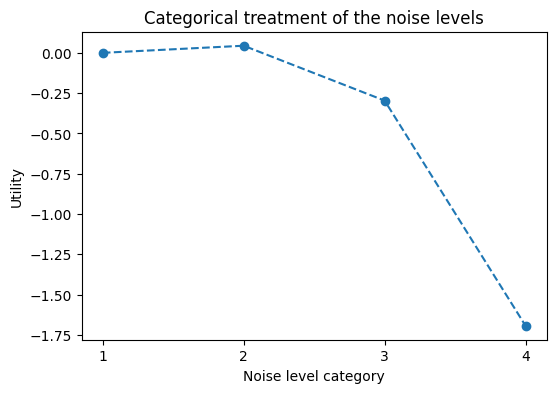

In [18]:
# Illustrate the effect of noise levels the utility
fig, ax = plt.subplots(figsize=(6, 4))

# Add B_noise_cat1 = 0 to the beta_hat_cat
beta_hat_cat.loc['B_noise_cat1', 'Value']  = 0
beta_noise = beta_hat_cat.loc[['B_noise_cat1','B_noise_cat2','B_noise_cat3','B_noise_cat4'],'Value'].values
print(f' beta_noise = {beta_noise}')

# Plot the effect of the noise levels on utility
x = np.sort(df['NOISE1'].unique())
V = beta_noise

ax.plot(x, V,'o--')
ax.set_xlabel('Noise level category')
ax.set_xticks(x)
ax.set_ylabel('Utility')
ax.set_title('Categorical treatment of the noise levels')
plt.show()

**Interpretation:**<br>
* The plot shows that people are indifferent to noise levels 1 and 2. However, they have a strong preference for (avoiding) higher noise levels. People derive especially a big disutility from noise level 4.
* The line is dashed because the model treats `NOISE` as a categorical variable. This means that between the point a linear interpolation is made.  But this is just an assumption. We do not know the exact shape of the utility function.

## Part 2: Understanding the impact of the sample size on the <br> standard errors of the estimates

The more data observations we have, the more **precise** our estimates will be. In this part, we will investigate how the sample size affects the **standard errors** of the estimates. We will do this by estimating the linear-additive RUM-MNL model with different sample sizes and inspect how the magnitudes of standard errors of the estimates decrease with increasing sample size.

In [19]:
# Define the fractions to sample
frac = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a pandas dataframe to store the results
df_std_err_frac = pd.DataFrame(index=beta_hat_MNL.index, columns=frac)

# Loop over the fractions
for fraction in frac:
    
    # Randomly sample frac% of the data
    df_frac = df.sample(frac=fraction, random_state=42)  # Using random_state for reproducibility

    # Create a new Biogeme database with the sampled data
    biodata_frac = db.Database('Neighbourhood_choice_data_sampled', df_frac)


    # Give a name to the model    
    model_name = f'Linear-additive RUM-MNL with {fraction*100}% of the data'

    # Redefine the utility functions
    V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
    V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
    V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

    # Estimate the model
    results_MNL_frac = estimate_mnl(V1,V2,V3,CHOICE,biodata_frac,model_name)

    # Get the model parameters in a pandas table and  print it
    beta_hat_MNL_frac   = results_MNL_frac.get_estimated_parameters()
    df_std_err_frac.loc[:,fraction] = beta_hat_MNL_frac['Rob. Std err']
    
# Show the results
df_std_err_frac

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
B_city,0.025659,0.017825,0.014687,0.012712,0.011388,0.010438,0.009657,0.009049,0.008535,0.008076
B_foreign,0.344377,0.243275,0.201172,0.172397,0.154735,0.141234,0.13014,0.121684,0.115095,0.109049
B_green,0.036943,0.025366,0.020631,0.017811,0.01613,0.014711,0.013532,0.012698,0.012008,0.011397
B_noise,0.034991,0.023641,0.019207,0.016411,0.014791,0.013531,0.012527,0.011753,0.011094,0.010593
B_stores,0.008388,0.005708,0.004677,0.004058,0.003647,0.003345,0.003099,0.002895,0.002726,0.002587
B_transport,0.007771,0.005475,0.004429,0.003866,0.003477,0.003191,0.002969,0.002783,0.002624,0.002486


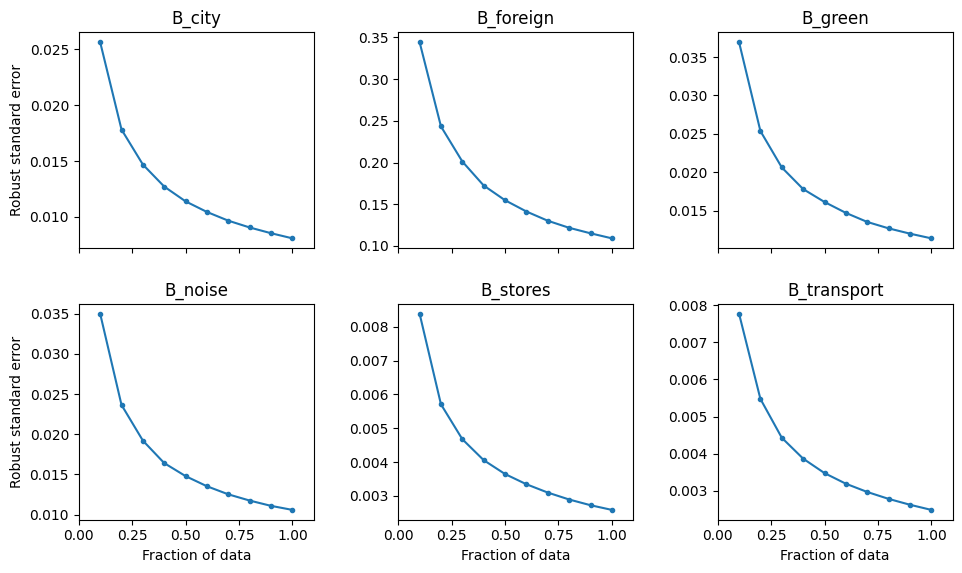

In [20]:
# Let's plot the standard errors for each beta as a function of the fraction of data
fig, ax = plt.subplots(2,3,figsize=(10, 6), sharex=True)
fig.tight_layout(pad=3.0)
ax = ax.flatten()   
for i, beta in enumerate(beta_hat_MNL.index):
    # Plot the standard errors for each beta
    ax[i].plot(frac, df_std_err_frac.loc[beta].values, marker='.')
    ax[i].set_title(beta)
    ax[i].set_xlim(0, 1.1)
    if i >=3:
        ax[i].set_xlabel('Fraction of data')

ax[0].set_ylabel('Robust standard error')   
ax[3].set_ylabel('Robust standard error')   
plt.show()

### `Exercise 3: Standard errors`
Standard errors tell us how different the 𝛽 ̂s would have been if we had estimated the same choice model on a new sample of the same size. In the plot above, the standard errors are computed based on the second order derivatives of the log-likelihood function. Therefore, these are called "analytical standard errors". Another way to obtain the standard errors, is through a **sampling** approach (aka bootstrapping). This entails estimating the model numerous times based on a random sample of the data.
<br>

`A` Use sampling to investigate the standard errors of the estimates. Estimate the linear-additive RUM-MNL model hundred times, using a small fraction of 10%. 
<br>
Hint: to ensure that you draw different samples each time, you can use the `sample()` function, set the `random_state` parameter to a different value each time, e.g. `random_state=1`, `random_state=2`, etc.

`B` Can you reproduce the magnitudes of the standard errors in the plot above?<br>

`C` Suppose that you would use a larger sampling fraction (e.g. 99%). Can you still reproduce the magnitudes of the standard errors in the plot above?<br>

#### `Answers`

In [21]:
# A
# Define the fractions to sample
fraction = 0.1
repetitions = 100

# Create a pandas dataframe to store the results
df_est_frac = pd.DataFrame(index=beta_hat_MNL.index, columns=range(repetitions))

# Loop over the fractions
for i in range(repetitions):
    
    # Randomly sample frac% of the data
    df_frac = df.sample(frac=fraction, random_state=i)

    # Create a new Biogeme database with the sampled data
    biodata_frac = db.Database('Neighbourhood_choice_data_sampled', df_frac)


    # Give a name to the model    
    model_name = f'Linear-additive RUM-MNL with {fraction*100}% of the data'

    # Redefine the utility functions
    V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
    V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
    V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

    # Estimate the model
    results_MNL_frac = estimate_mnl(V1,V2,V3,CHOICE,biodata_frac,model_name)

    # Get the model parameters in a pandas table and  print it
    beta_hat_MNL_frac   = results_MNL_frac.get_estimated_parameters()
    df_est_frac.loc[:,i] = beta_hat_MNL_frac['Value']

# Compute the standard deviation of the estimates
std_empirical = df_est_frac.T.std()

# Show the results
std_empirical

B_city         0.025205
B_foreign       0.34342
B_green        0.029244
B_noise        0.030226
B_stores       0.007843
B_transport    0.007318
dtype: object

In [22]:
# B
std_analytical = df_std_err_frac[fraction]

# Compare the empirical and analytical standard errors
std_comparison = pd.DataFrame({'Empirical':std_empirical, 'Analytical':std_analytical,'Ratio':std_analytical/std_empirical})

# Show the results
std_comparison

,Empirical,Analytical,Ratio
B_city,0.025205,0.025659,1.018033
B_foreign,0.34342,0.344377,1.002787
B_green,0.029244,0.036943,1.263281
B_noise,0.030226,0.034991,1.157641
B_stores,0.007843,0.008388,1.069437
B_transport,0.007318,0.007771,1.061844


**Interpretation:**<br> 
The ratios of the analytical standard errors over the empirical standard errors are very close to 1. This indicates that the analytical standard errors are a good approximation of the empirical standard errors.  

In [23]:
# C
# This sampling approach will fail with a large fraction (e.g. of 99%), as the empirical standard errors will approach zero. 
# This is because we are not really sampling from the target population. Instead we sample from the sample. 
# Hence, the analytical standard errors are much larger (and more reliable) than the empirical standard errors which treats the sample as if it were the population.